# Feature Exploration - ePA Prediction

Exploring whether features in the data are connected to our target variable: pharmacy_claim_approved.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8.0,6.0)})

In [2]:
data = pd.read_csv('../../data/training/train.csv',index_col=1, parse_dates=True)

In [3]:
pa_columns = ['correct_diagnosis','tried_and_failed','contraindication','pa_approved','reject_code']
id_columns = ['dim_pa_id','dim_date_id','dim_claim_id','Unnamed: 0']
date_columns = ['calendar_year']

data = data.drop(columns=pa_columns+id_columns+date_columns)

In [6]:
data.head()

,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,bin,drug,pharmacy_claim_approved
date_val,,,,,,,,,
2019-06-18,6,18,3,1,1,0,999001,C,1
2019-02-07,2,7,5,1,1,0,999001,B,1
2017-01-19,1,19,5,1,1,0,417614,B,0
2019-04-01,4,1,2,1,1,0,417614,B,0
2017-11-07,11,7,3,1,1,0,417380,A,0


In [43]:
def bar_plot(feature):
    feature_data = data.groupby(feature)
    approval_rate = 100*(feature_data['pharmacy_claim_approved'].sum())/feature_data['pharmacy_claim_approved'].count()
    print('Approval Rates')
    print(approval_rate)
    
    approval_rate.plot.bar(x='day of week', y='val', title='% claim approval rate')

### % Approval Rate By Feature Type

['bin','drug','calendar_month','calendar_day','day_of_week','is_weekday','is_workday','is_holiday']:

Approval Rates
bin
417380    23.145128
417614    21.195634
417740    45.754177
999001    89.998648
Name: pharmacy_claim_approved, dtype: float64


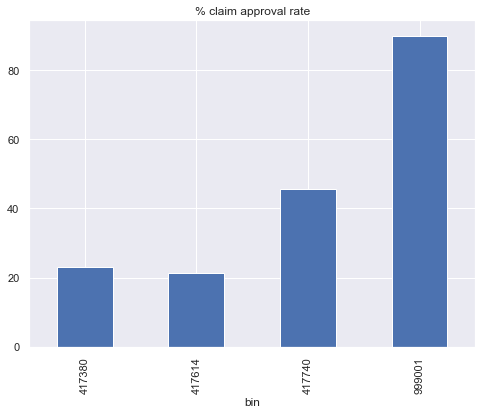

In [44]:
bar_plot('bin')

Approval Rates
drug
A    57.575411
B    54.905074
C    63.896053
Name: pharmacy_claim_approved, dtype: float64


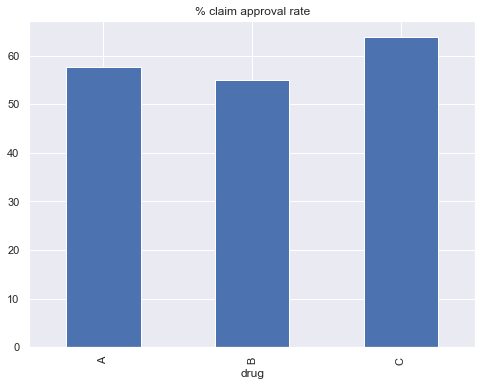

In [45]:
bar_plot('drug')

Approval Rates
is_workday
0    58.322437
1    58.381723
Name: pharmacy_claim_approved, dtype: float64


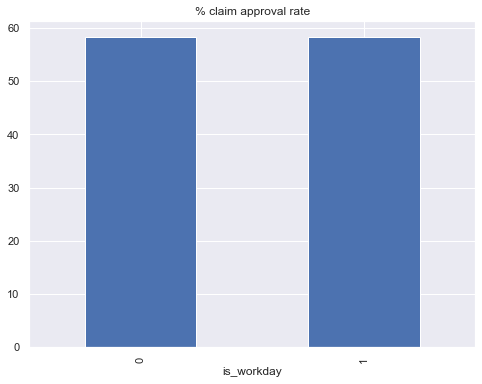

In [46]:
bar_plot('is_workday')

Approval Rates
is_holiday
0    58.380619
1    57.531067
Name: pharmacy_claim_approved, dtype: float64


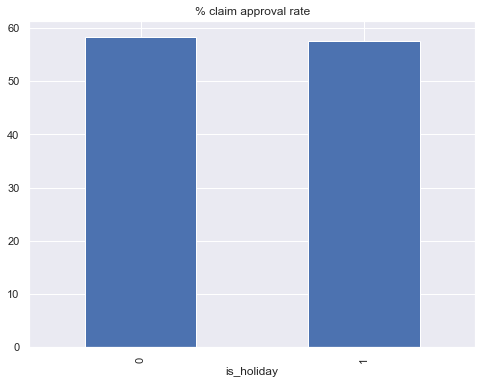

In [47]:
bar_plot('is_holiday')

Approval Rates
is_weekday
0    58.356435
1    58.376064
Name: pharmacy_claim_approved, dtype: float64


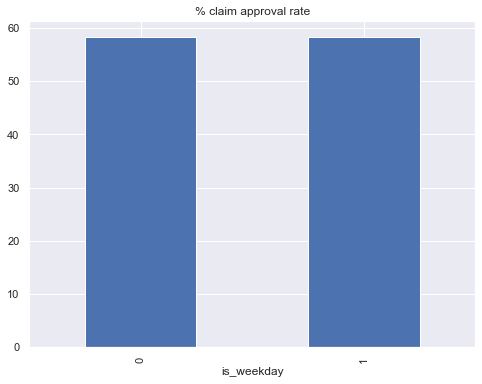

In [49]:
bar_plot('is_weekday')

Approval Rates
day_of_week
1    58.471150
2    58.538164
3    58.370539
4    58.425515
5    58.395743
6    58.158671
7    58.240647
Name: pharmacy_claim_approved, dtype: float64


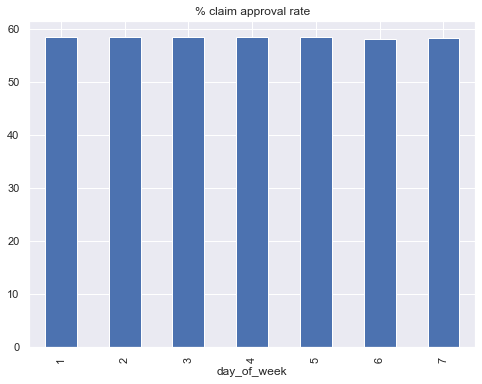

In [52]:
bar_plot('day_of_week')

Approval Rates
calendar_month
1     58.158974
2     58.584264
3     58.110252
4     58.587130
5     58.313064
6     58.464509
7     58.487820
8     58.578714
9     58.333453
10    58.265876
11    58.494067
12    58.139823
Name: pharmacy_claim_approved, dtype: float64


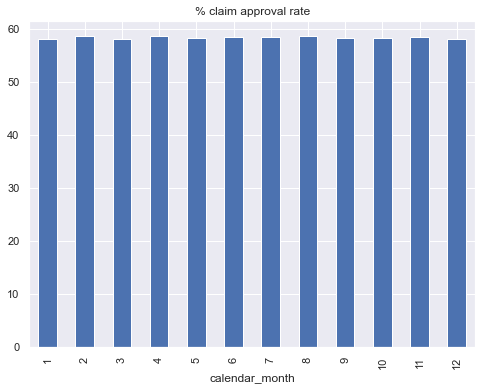

In [50]:
bar_plot('calendar_month')

Approval Rates
calendar_day
1     58.181623
2     58.025306
3     58.171979
4     58.057371
5     58.184781
6     58.180806
7     58.726136
8     58.023731
9     58.040476
10    58.855718
11    58.032055
12    58.180878
13    58.055447
14    58.442704
15    58.783854
16    58.570210
17    58.092775
18    58.553642
19    58.444611
20    58.863859
21    58.753182
22    58.307188
23    58.558433
24    58.359522
25    58.265382
26    58.804105
27    58.540707
28    58.243430
29    58.063880
30    58.844573
31    58.288741
Name: pharmacy_claim_approved, dtype: float64


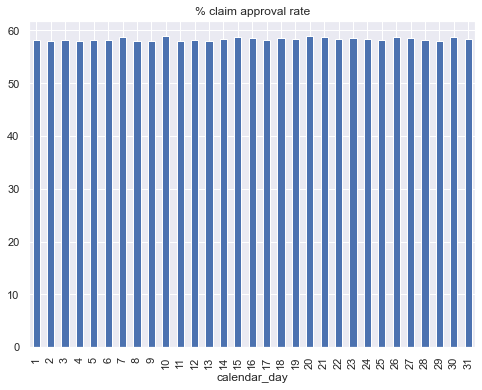

In [51]:
bar_plot('calendar_day')